In [1]:
import petl
import psycopg2
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# suppress bullshit scipy warnings
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [9]:
conn = psycopg2.connect('dbname=nfldb')

In [10]:
qb_agg = petl.fromdb(conn, 'select * from lombardi.qb_aggs')

In [11]:
qb_agg

year,full_name,avg_yds,avg_tds,avg_int,avg_cmp,avg_att,std_yds,std_tds,std_int,std_cmp,std_att,num_games
2009,Aaron Rodgers,277.13,1.88,0.44,21.88,33.81,68.14,0.96,0.89,6.20,8.61,16
2009,Alex Smith,213.64,1.64,1.09,20.45,33.82,55.69,0.92,1.14,4.95,7.85,11
2009,Ben Roethlisberger,288.53,1.73,0.80,22.47,33.73,96.10,1.10,0.68,5.53,6.52,15
2009,Brian Hoyer,47.33,0.00,0.00,6.33,9.00,26.31,0.00,0.00,3.79,4.36,3
2009,Carson Palmer,193.38,1.31,0.81,17.63,29.13,77.50,1.30,0.75,5.77,8.06,16


In [15]:
qb_agg_full = qb_agg.selecteq('num_games', 16).todataframe()

In [18]:
qb_agg_full.head()

,year,full_name,avg_yds,avg_tds,avg_int,avg_cmp,avg_att,std_yds,std_tds,std_int,std_cmp,std_att,num_games
0,2009,Aaron Rodgers,277.13,1.88,0.44,21.88,33.81,68.14,0.96,0.89,6.20,8.61,16
1,2009,Carson Palmer,193.38,1.31,0.81,17.63,29.13,77.50,1.30,0.75,5.77,8.06,16
2,2009,Eli Manning,251.31,1.69,0.88,19.81,31.81,73.89,1.01,0.89,5.94,8.60,16
3,2009,Joe Flacco,225.81,1.31,0.75,19.69,31.19,77.50,1.14,0.93,5.55,8.77,16
4,2009,Matt Schaub,298.13,1.81,0.94,24.75,36.44,63.62,1.17,0.68,6.06,6.82,16


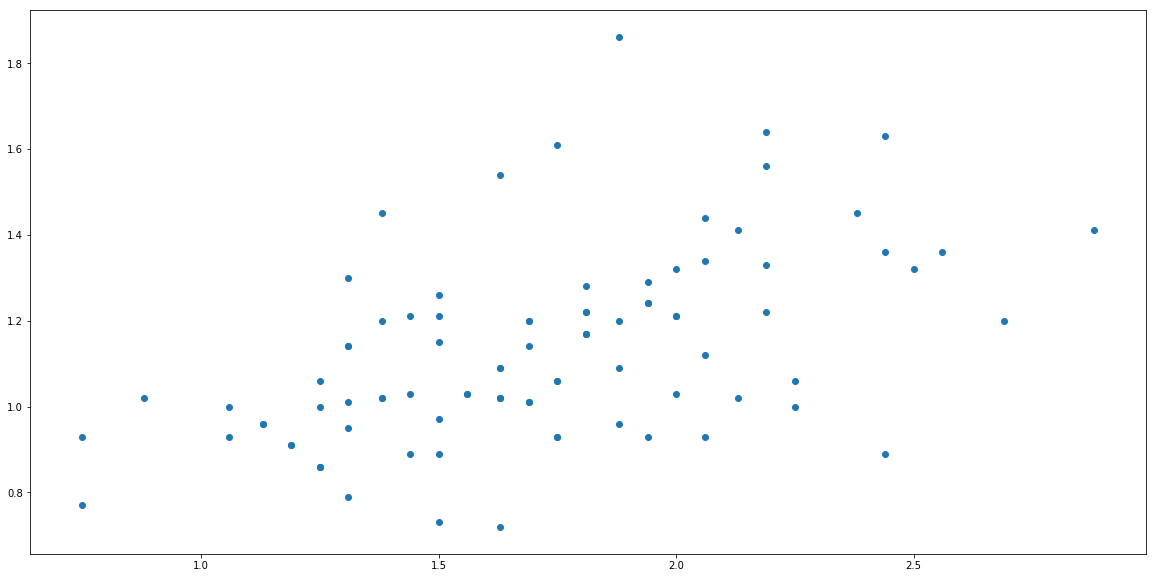

In [17]:
plt.scatter(qb_agg_full['avg_tds'], qb_agg_full['std_tds'])

In [25]:
tds = list(qb_agg_full['avg_tds'])

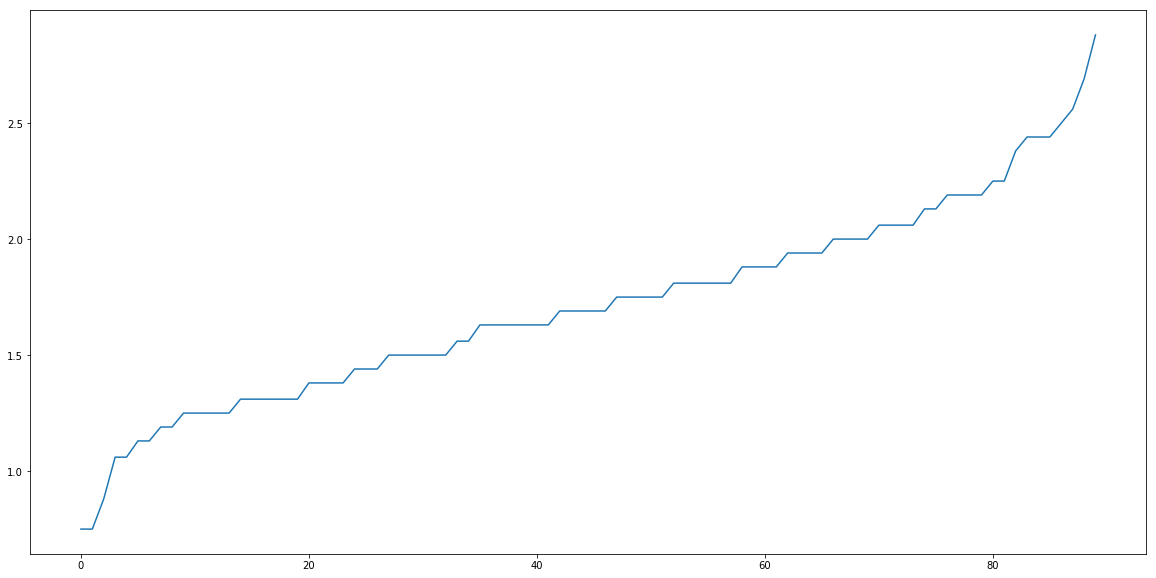

In [26]:
plt.plot(range(len(yds)), sorted(tds))

In [29]:
min_tds = 0
max_tds = 3
div = 0.5

num_bins = int((max_tds - min_tds) / div)

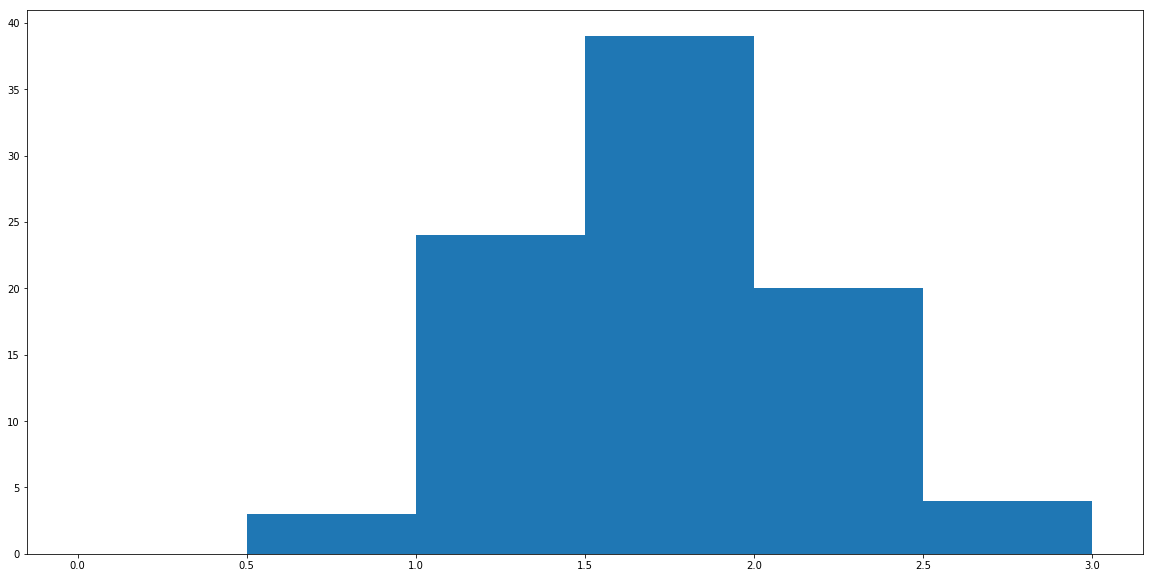

In [47]:
x,y, = plt.hist(tds, bins=6, range=(0,3))

In [52]:
qb_aggs_full.head()

NameError: name 'qb_aggs_full' is not defined

In [55]:
qbs = petl.fromdataframe(qb_agg_full)

In [76]:
qbs = qbs.addfield('bucket', lambda rec: int(float(rec['avg_tds']) // 0.5))

In [77]:
qb_buckets = qbs.sort(('bucket', 'year', 'full_name'))

In [78]:
qb_buckets

year,full_name,avg_yds,avg_tds,avg_int,avg_cmp,avg_att,std_yds,std_tds,std_int,std_cmp,std_att,num_games,bucket
2012,Ryan Tannehill,205.88,0.75,0.81,17.63,30.25,86.01,0.77,1.11,5.56,8.42,16,1
2013,Geno Smith,190.38,0.75,1.31,15.44,27.69,74.23,0.93,1.01,5.62,7.54,16,1
2015,Teddy Bridgewater,201.94,0.88,0.56,18.25,27.94,74.79,1.02,0.63,5.26,7.06,16,1
2009,Carson Palmer,193.38,1.31,0.81,17.63,29.13,77.50,1.30,0.75,5.77,8.06,16,2
2009,Joe Flacco,225.81,1.31,0.75,19.69,31.19,77.50,1.14,0.93,5.55,8.77,16,2


In [83]:
conn = psycopg2.connect('dbname=nfldb')
qb_games = petl.fromdb(conn, '''
    select
        s.year,
        s.week,
        s.full_name,
        s.touchdowns
    from
        lombardi.qb_stats s
        join
            lombardi.qb_aggs a
            on s.year = a.year
            and s.full_name = a.full_name
    where
        a.num_games = 16
''')

In [98]:
seasons = (
    qb_buckets
    .join(qb_games, key=('year', 'full_name'))
    .cut(('year', 'full_name', 'bucket', 'week', 'touchdowns'))
)

(array([ 21.,  19.,   6.,   1.,   1.,   0.,   0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 7 Patch objects>)

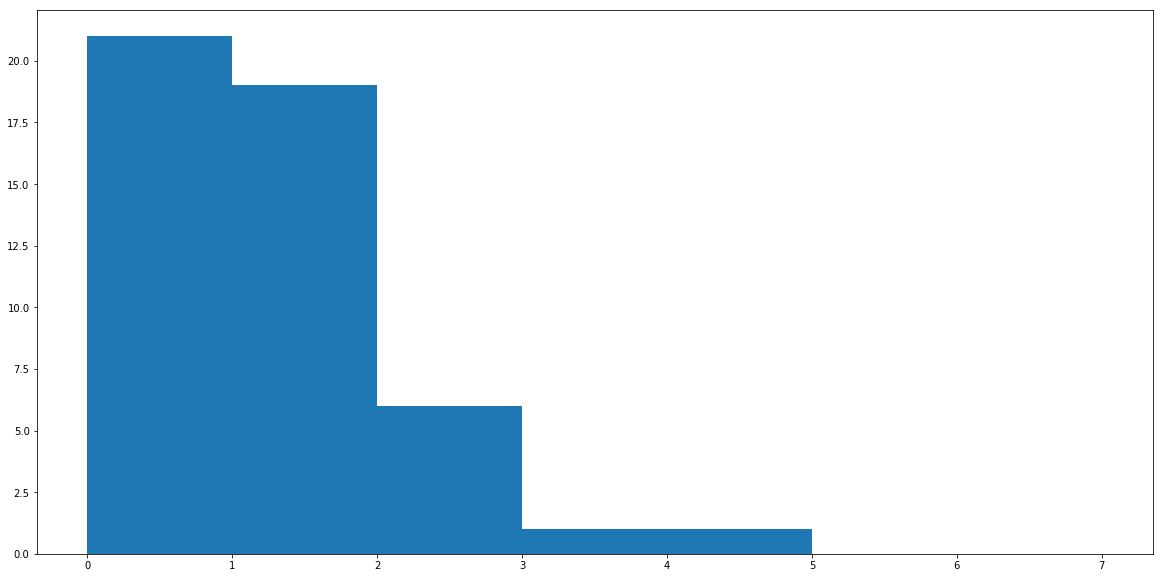

In [99]:
plt.hist(list(seasons.selecteq('bucket', 1)['touchdowns']), bins=7, range=(0,7))

(array([  2.,  11.,  17.,  17.,  11.,   6.,   0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 <a list of 7 Patch objects>)

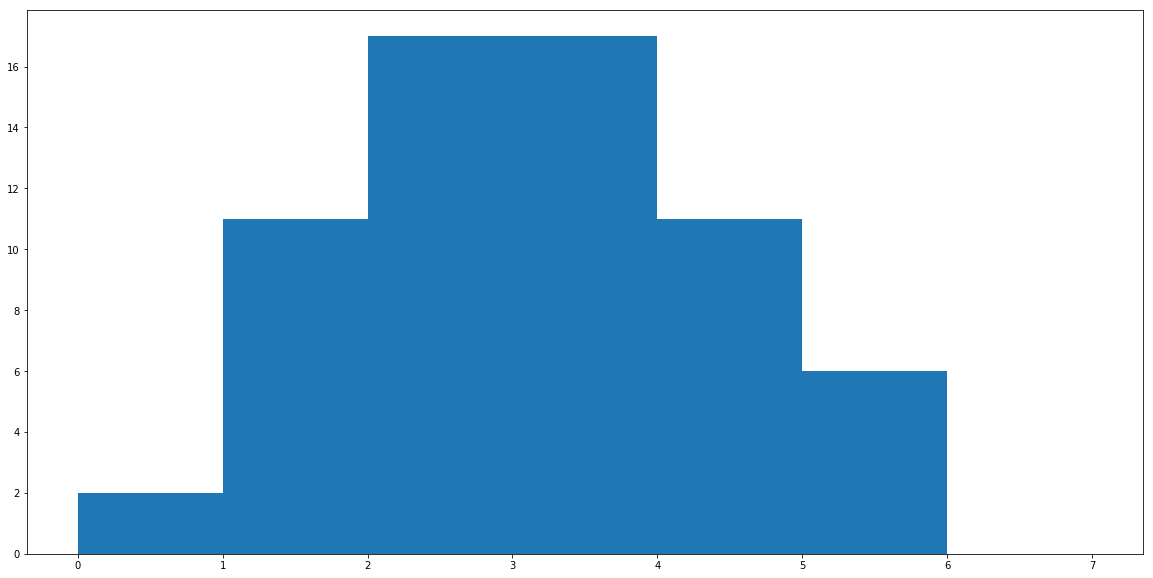

In [100]:
plt.hist(list(seasons.selecteq('bucket', 5)['touchdowns']), bins=7, range=(0,7))

In [133]:
records = []

for bucket in set(seasons['bucket']):
    
    sub = seasons.selecteq('bucket', bucket)
    
    record = {}
    record['bucket'] = bucket
    
    counter = Counter(sub['touchdowns'])
    tot = sum(counter.values())
    
    for tds in range(7):
        records.append(dict(
            bucket=bucket,
            tds=tds,
            num=counter.get(tds, 0),
            p=round(counter.get(tds,0)/tot, 2),
        ))

In [134]:
records

[{'bucket': 1, 'num': 21, 'p': 0.44, 'tds': 0},
 {'bucket': 1, 'num': 19, 'p': 0.4, 'tds': 1},
 {'bucket': 1, 'num': 6, 'p': 0.12, 'tds': 2},
 {'bucket': 1, 'num': 1, 'p': 0.02, 'tds': 3},
 {'bucket': 1, 'num': 1, 'p': 0.02, 'tds': 4},
 {'bucket': 1, 'num': 0, 'p': 0.0, 'tds': 5},
 {'bucket': 1, 'num': 0, 'p': 0.0, 'tds': 6},
 {'bucket': 2, 'num': 90, 'p': 0.23, 'tds': 0},
 {'bucket': 2, 'num': 147, 'p': 0.38, 'tds': 1},
 {'bucket': 2, 'num': 109, 'p': 0.28, 'tds': 2},
 {'bucket': 2, 'num': 29, 'p': 0.08, 'tds': 3},
 {'bucket': 2, 'num': 6, 'p': 0.02, 'tds': 4},
 {'bucket': 2, 'num': 3, 'p': 0.01, 'tds': 5},
 {'bucket': 2, 'num': 0, 'p': 0.0, 'tds': 6},
 {'bucket': 3, 'num': 78, 'p': 0.12, 'tds': 0},
 {'bucket': 3, 'num': 211, 'p': 0.34, 'tds': 1},
 {'bucket': 3, 'num': 196, 'p': 0.31, 'tds': 2},
 {'bucket': 3, 'num': 99, 'p': 0.16, 'tds': 3},
 {'bucket': 3, 'num': 34, 'p': 0.05, 'tds': 4},
 {'bucket': 3, 'num': 3, 'p': 0.0, 'tds': 5},
 {'bucket': 3, 'num': 3, 'p': 0.0, 'tds': 6},
 {'b

In [136]:
likelihoods = petl.fromdicts(records)

In [138]:
qb_buckets

year,full_name,avg_yds,avg_tds,avg_int,avg_cmp,avg_att,std_yds,std_tds,std_int,std_cmp,std_att,num_games,bucket
2012,Ryan Tannehill,205.88,0.75,0.81,17.63,30.25,86.01,0.77,1.11,5.56,8.42,16,1
2013,Geno Smith,190.38,0.75,1.31,15.44,27.69,74.23,0.93,1.01,5.62,7.54,16,1
2015,Teddy Bridgewater,201.94,0.88,0.56,18.25,27.94,74.79,1.02,0.63,5.26,7.06,16,1
2009,Carson Palmer,193.38,1.31,0.81,17.63,29.13,77.50,1.30,0.75,5.77,8.06,16,2
2009,Joe Flacco,225.81,1.31,0.75,19.69,31.19,77.50,1.14,0.93,5.55,8.77,16,2


In [139]:
counter = Counter(qb_buckets['bucket'])

In [140]:
counter

Counter({1: 3, 2: 24, 3: 39, 4: 20, 5: 4})

In [141]:
bucket_records = [dict(bucket=k, num=v, p=round(v/sum(counter.values()),2)) for k,v in counter.items()]

In [142]:
bucket_records

[{'bucket': 1, 'num': 3, 'p': 0.03},
 {'bucket': 2, 'num': 24, 'p': 0.27},
 {'bucket': 3, 'num': 39, 'p': 0.43},
 {'bucket': 4, 'num': 20, 'p': 0.22},
 {'bucket': 5, 'num': 4, 'p': 0.04}]

In [145]:
prior = petl.fromdicts(bucket_records)

In [146]:
prior

bucket,num,p
1,3,0.03
2,24,0.27
3,39,0.43
4,20,0.22
5,4,0.04


In [147]:
likelihoods

bucket,tds,num,p
1,0,21,0.44
1,1,19,0.4
1,2,6,0.12
1,3,1,0.02
1,4,1,0.02


In [184]:
posterior = prior.join(likelihoods, key='bucket', lprefix='pr_', rprefix='lk_').selecteq('lk_tds', 0)

In [185]:
posterior.lookall()

+-----------+--------+------+--------+--------+------+
| pr_bucket | pr_num | pr_p | lk_tds | lk_num | lk_p |
+===========+========+======+========+========+======+
|         1 |      3 | 0.03 |      0 |     21 | 0.44 |
+-----------+--------+------+--------+--------+------+
|         2 |     24 | 0.27 |      0 |     90 | 0.23 |
+-----------+--------+------+--------+--------+------+
|         3 |     39 | 0.43 |      0 |     78 | 0.12 |
+-----------+--------+------+--------+--------+------+
|         4 |     20 | 0.22 |      0 |     20 | 0.06 |
+-----------+--------+------+--------+--------+------+
|         5 |      4 | 0.04 |      0 |      2 | 0.03 |
+-----------+--------+------+--------+--------+------+

In [186]:
posterior = posterior.addfield('p_new', lambda r: r['pr_p']*r['lk_p'])

In [187]:
posterior.addfield('p_norm', lambda r: r['p_new'] / sum(posterior['p_new']))

pr_bucket,pr_num,pr_p,lk_tds,lk_num,lk_p,p_new,p_norm
1,3,0.03,0,21,0.44,0.0132,0.09341825902335456
2,24,0.27,0,90,0.23,0.06210000000000001,0.4394904458598726
3,39,0.43,0,78,0.12,0.0516,0.3651804670912951
4,20,0.22,0,20,0.06,0.0132,0.09341825902335456
5,4,0.04,0,2,0.03,0.0012,0.00849256900212314


In [190]:
posterior = (
    prior
    .join(likelihoods, key='bucket', lprefix='pr_', rprefix='lk_')
    .selecteq('lk_tds', 0)
    .addfield('p_new', lambda r: r['pr_p']*r['lk_p'])
)
posterior = posterior.addfield('p_norm', lambda r: r['p_new'] / sum(posterior['p_new']))

In [193]:
prior.look()

+--------+-----+------+
| bucket | num | p    |
+========+=====+======+
|      1 |   3 | 0.03 |
+--------+-----+------+
|      2 |  24 | 0.27 |
+--------+-----+------+
|      3 |  39 | 0.43 |
+--------+-----+------+
|      4 |  20 | 0.22 |
+--------+-----+------+
|      5 |   4 | 0.04 |
+--------+-----+------+

In [194]:
likelihoods.look()

+--------+-----+-----+------+
| bucket | tds | num | p    |
+========+=====+=====+======+
|      1 |   0 |  21 | 0.44 |
+--------+-----+-----+------+
|      1 |   1 |  19 |  0.4 |
+--------+-----+-----+------+
|      1 |   2 |   6 | 0.12 |
+--------+-----+-----+------+
|      1 |   3 |   1 | 0.02 |
+--------+-----+-----+------+
|      1 |   4 |   1 | 0.02 |
+--------+-----+-----+------+
...

In [198]:
def posterior(prior, likelihoods, event_tds):
    
    pst = (
        prior
        .join(likelihoods, key='bucket', lprefix='pr_', rprefix='lk_')
        .selecteq('lk_tds', 0)
        .addfield('p_new', lambda r: r['pr_p']*r['lk_p'])
    )
    tot = sum(pst['p_new'])
    pst = pst.addfield('p_norm', lambda r: round(r['p_new']/tot, 2))
    pst = pst.cut(('pr_bucket', 'p_norm'))
    pst = pst.rename({'pr_bucket': 'bucket', 'p_norm': 'p'})
    return pst

In [201]:
p = posterior(prior, likelihoods, 0)

In [202]:
p.lookall()

+--------+------+
| bucket | p    |
+========+======+
|      1 | 0.09 |
+--------+------+
|      2 | 0.44 |
+--------+------+
|      3 | 0.37 |
+--------+------+
|      4 | 0.09 |
+--------+------+
|      5 | 0.01 |
+--------+------+

In [204]:
prior

bucket,num,p
1,3,0.03
2,24,0.27
3,39,0.43
4,20,0.22
5,4,0.04


In [205]:
pst = (
        prior
        .join(likelihoods, key='bucket', lprefix='pr_', rprefix='lk_')
        .addfield('p_new', lambda r: r['pr_p']*r['lk_p'])
    )

In [209]:
pst.aggregate('lk_tds', sum, 'p_new').lookall()

+--------+----------------------+
| lk_tds | value                |
+========+======================+
|      0 |               0.1413 |
+--------+----------------------+
|      1 |   0.3248000000000001 |
+--------+----------------------+
|      2 |               0.2937 |
+--------+----------------------+
|      3 |               0.1502 |
+--------+----------------------+
|      4 |               0.0563 |
+--------+----------------------+
|      5 | 0.012899999999999998 |
+--------+----------------------+
|      6 |               0.0022 |
+--------+----------------------+

In [231]:
def posterior_predictive(posterior, likelihoods):
    pp = (
        posterior
        .join(likelihoods, key='bucket', lprefix='pr_', rprefix='lk_')
        .addfield('p_new', lambda r: r['pr_p']*r['lk_p'])
    )
    tot = sum(pp['p_new'])
    pp = pp.addfield('p_norm', lambda r: r['p_new']/tot)
    pp = pp.cut(('lk_tds', 'p_norm'))
    pp = pp.rename({'lk_tds': 'tds', 'p_norm': 'p'})
    pp = pp.aggregate('tds', sum, 'p')
    pp = pp.rename({'value': 'p'})
    pp = pp.convert('p', lambda x: round(x,2))
    return pp

In [241]:
pp = posterior_predictive(prior, likelihoods)

In [244]:
pp.lookall()

+-----+------+
| tds | p    |
+=====+======+
|   0 | 0.14 |
+-----+------+
|   1 | 0.33 |
+-----+------+
|   2 |  0.3 |
+-----+------+
|   3 | 0.15 |
+-----+------+
|   4 | 0.06 |
+-----+------+
|   5 | 0.01 |
+-----+------+
|   6 |  0.0 |
+-----+------+

In [246]:
prior.lookall()

+--------+-----+------+
| bucket | num | p    |
+========+=====+======+
|      1 |   3 | 0.03 |
+--------+-----+------+
|      2 |  24 | 0.27 |
+--------+-----+------+
|      3 |  39 | 0.43 |
+--------+-----+------+
|      4 |  20 | 0.22 |
+--------+-----+------+
|      5 |   4 | 0.04 |
+--------+-----+------+

In [248]:
from lombardi import bayes

In [249]:
likelihoods.look()

+--------+-----+-----+------+
| bucket | tds | num | p    |
+========+=====+=====+======+
|      1 |   0 |  21 | 0.44 |
+--------+-----+-----+------+
|      1 |   1 |  19 |  0.4 |
+--------+-----+-----+------+
|      1 |   2 |   6 | 0.12 |
+--------+-----+-----+------+
|      1 |   3 |   1 | 0.02 |
+--------+-----+-----+------+
|      1 |   4 |   1 | 0.02 |
+--------+-----+-----+------+
...

In [369]:
ld = dict()
for b in set(likelihoods['bucket']):
    
    tmp = likelihoods.selecteq('bucket', b)
    lk = petl.dicts(tmp.cut(('tds', 'p')))
    ld[b] = {p['tds']:p['p'] for p in lk}

In [370]:
ld = {k: bayes.Pdf(v) for k,v in ld.items()}

In [371]:
pd = bayes.Pdf({
    1: 0.03,
    2: 0.27,
    3: 0.43,
    4: 0.22,
    5: 0.04,
})

In [372]:
dist = bayes.DiscreteBayes(likelihoods=ld, prior=pd)

In [373]:
pps = dict()
for i in range(5):
    # simulate 5 5-touchdown games in a row
    pps[i] = list(dist.posterior_predictive().probs.values())
    dist.update_prior(5)

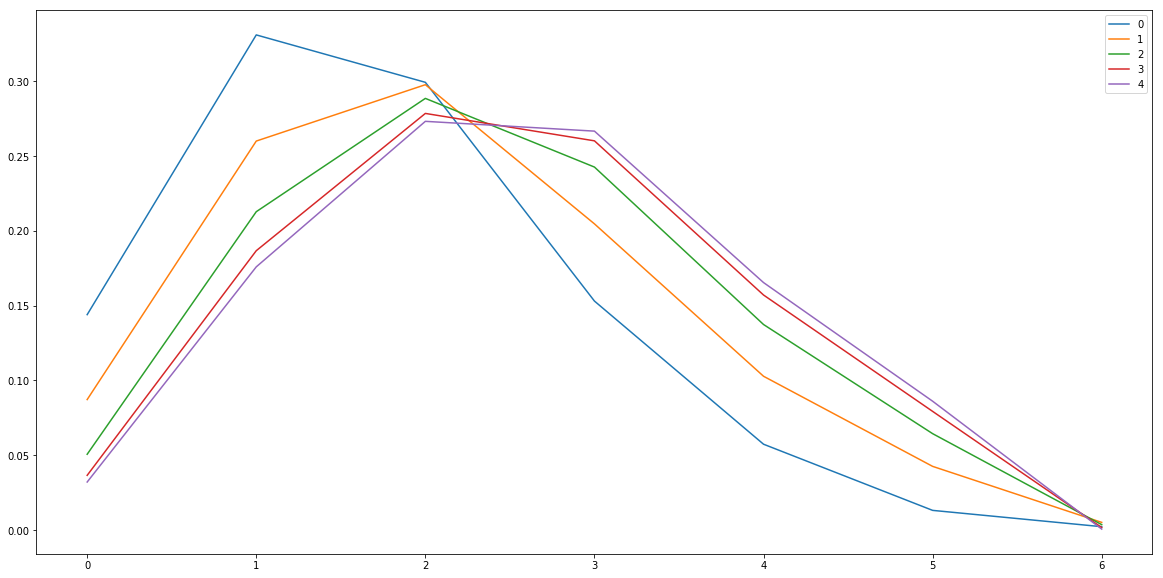

In [374]:
for k,v in pps.items():
    plt.plot(range(7), v, label=k)
plt.legend()

In [346]:
pp = dist.posterior_predictive()

In [347]:
pp

Pdf(probs={0: 0.14397799062563685, 1: 0.33095577746077043, 2: 0.2992663541878948, 3: 0.15304666802527, 4: 0.05736702669655594, 5: 0.01314448746688404, 6: 0.0022416955369879764})

In [350]:
before = dist.posterior_predictive()

In [351]:
dist.update_prior(5)

In [352]:
after = dist.posterior_predictive()

<Container object of 7 artists>

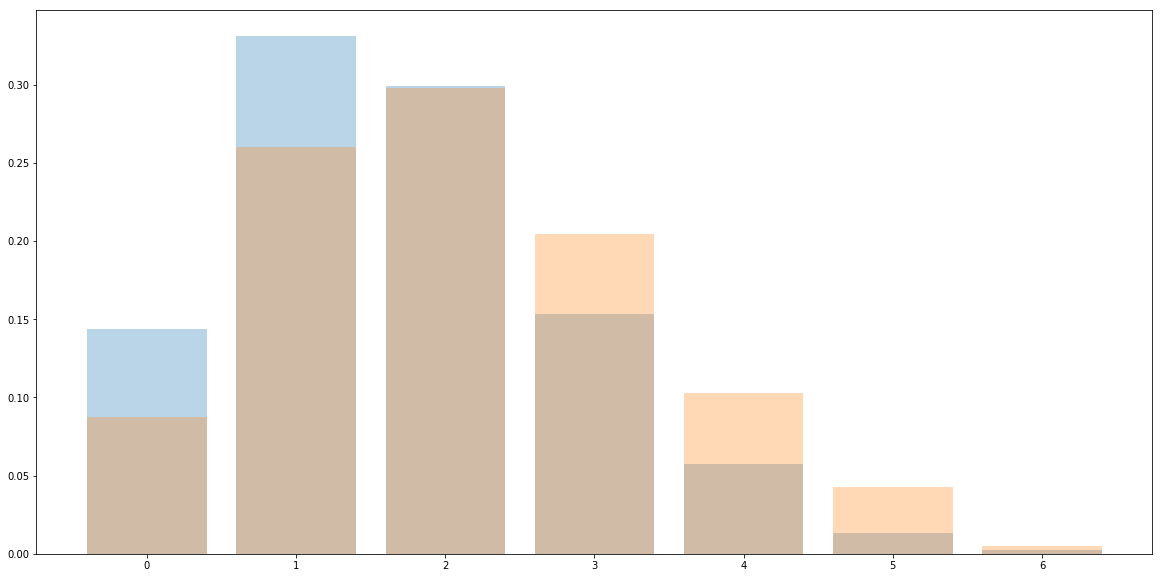

In [357]:
plt.bar(range(7), before.probs.values(), alpha=0.3)
plt.bar(range(7), after.probs.values(), alpha=0.3)

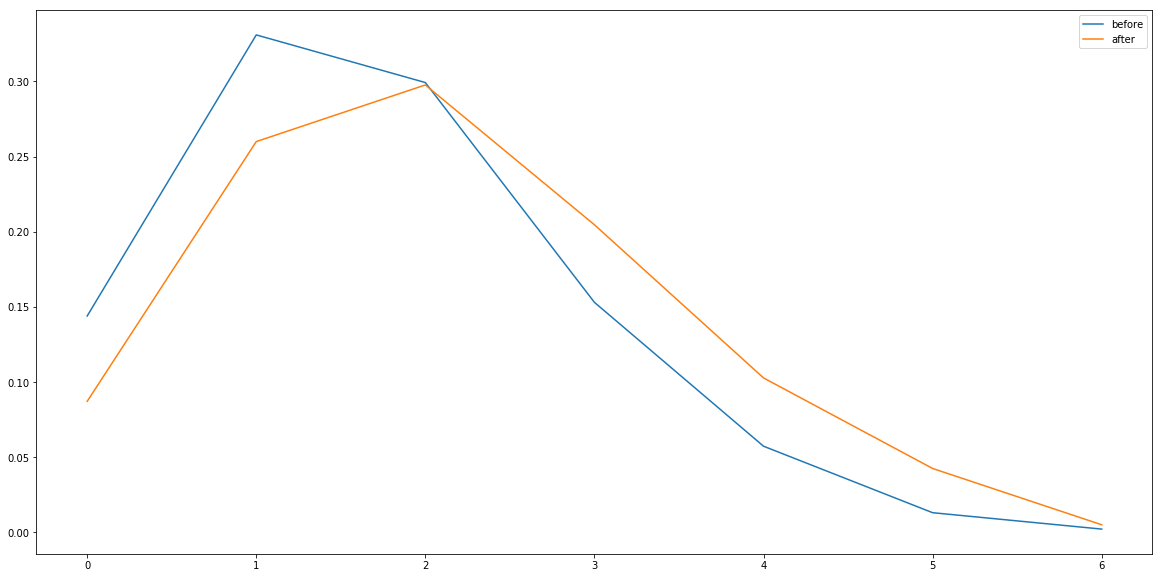

In [362]:
plt.plot(range(7), list(before.probs.values()), label='before')
plt.plot(range(7), list(after.probs.values()), label='after')
plt.legend()

In [376]:
expected_values = {k: sum(i*x for i,x in enumerate(v)) for k,v in pps.items()}

In [377]:
expected_values

{0: 1.6972692072549418,
 1: 2.1239534883720927,
 2: 2.410983606557377,
 3: 2.5591603053435117,
 4: 2.6182194417709335}

In [ ]:


pps = dict()
for i in range(5):
    # simulate 5 5-touchdown games in a row
    pps[i] = list(dist.posterior_predictive().probs.values())
    dist.update_prior(5)